In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [2]:
# import modules

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load dataset

df = pd.read_csv('wine.csv')

In [4]:
df

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
df['quality'].nunique()

7

In [6]:
df['quality'].mean()

5.818377712790519

In [7]:
df['quality'].min()

3

In [8]:
df['quality'].max()

9

In [9]:
'''
Trivially attainable performance:
By randomly choosing the quality of a wine with a scale from 3 to 9,
there is a 14.3% chance of choosing the correct quality level.
'''

x = 100/7
x

14.285714285714286

<AxesSubplot:>

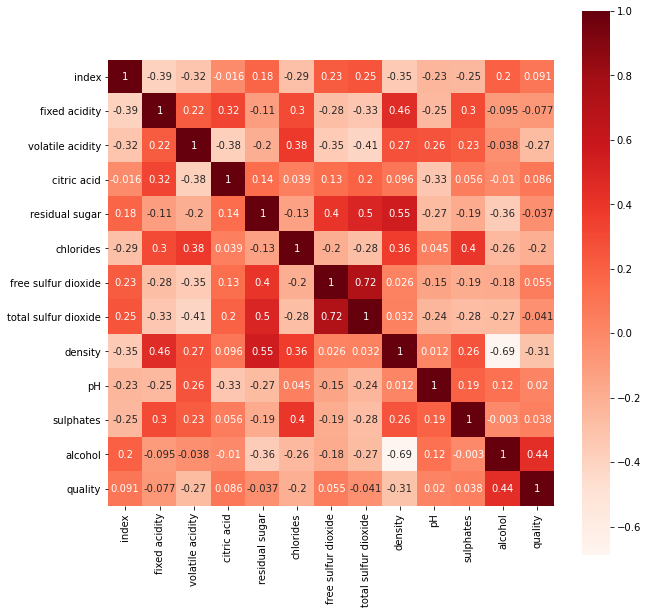

In [10]:
'''
Reasonable automated performance:
What can be attained by a relatively simple model.
Having this benchmark is vital in evaluating whether a complex model is performing well,
and enables us to address the accuracy/complexity tradeoff.
'''

X = df.iloc[:,:-1].values # features
Y = df.iloc[:,-1].values # dependent variable

correlation = df.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Reds')

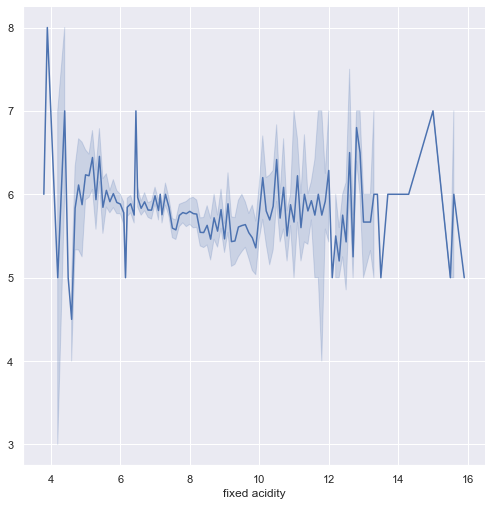

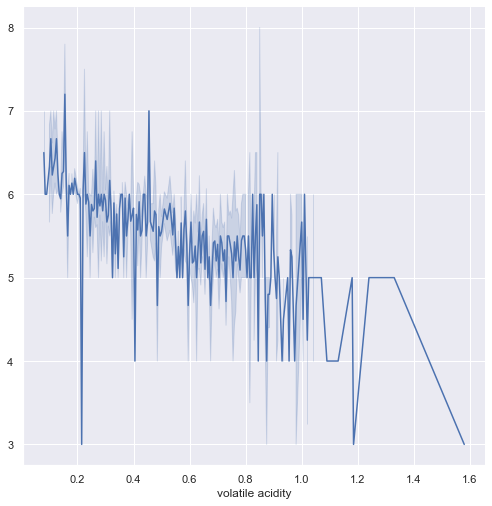

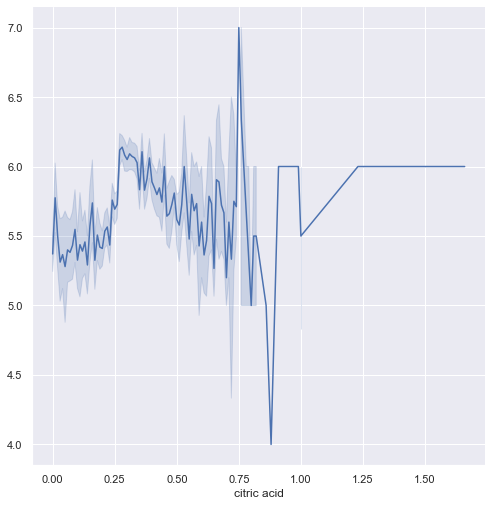

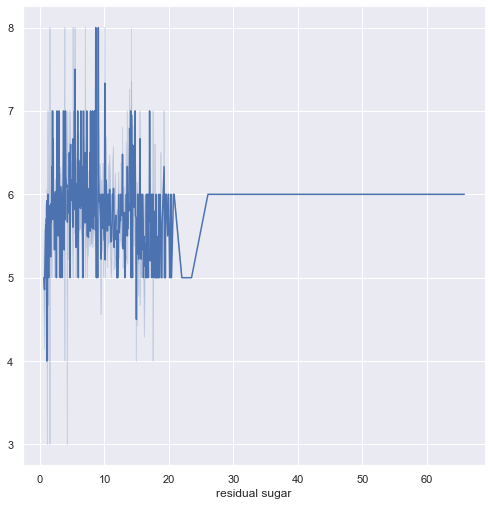

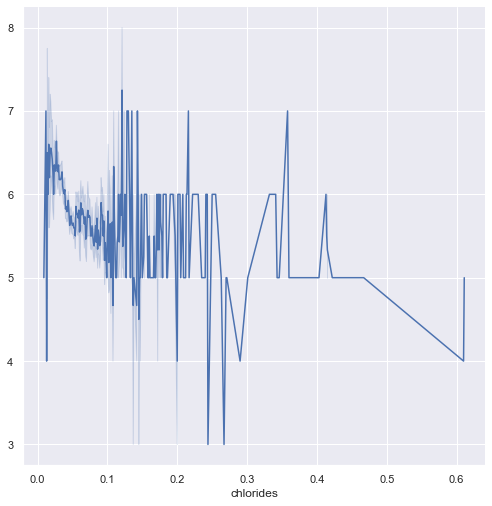

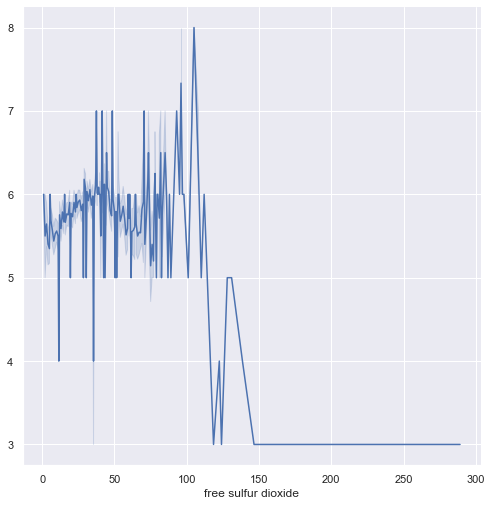

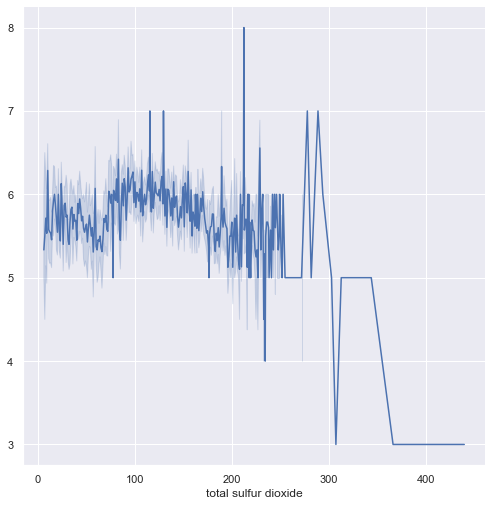

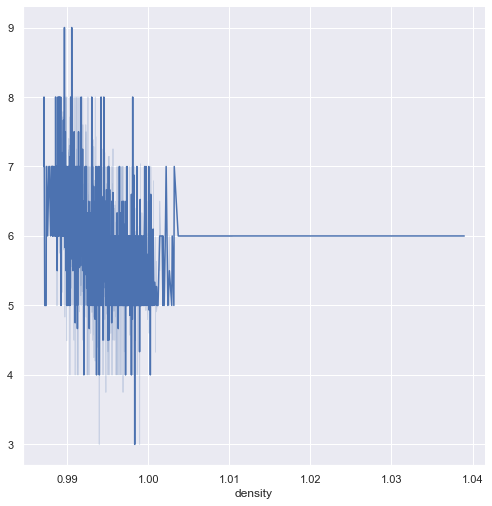

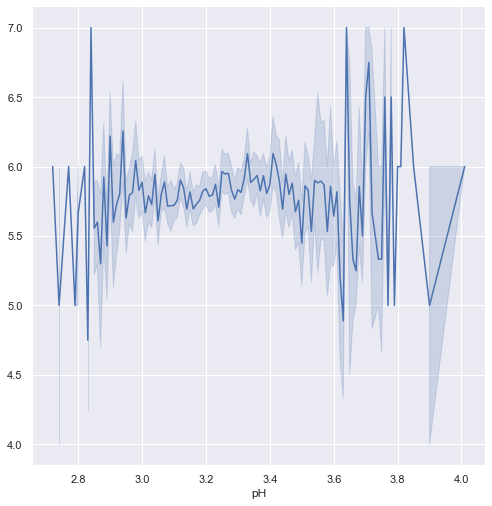

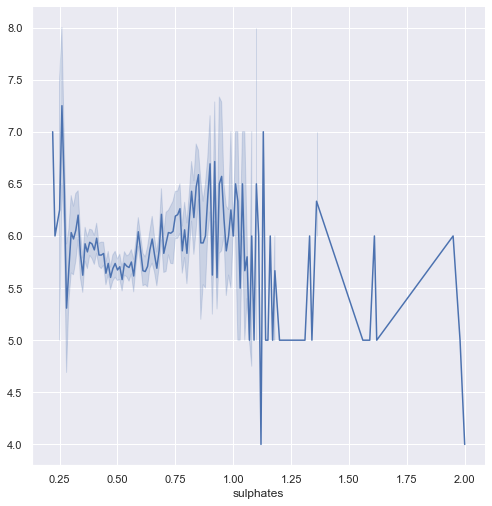

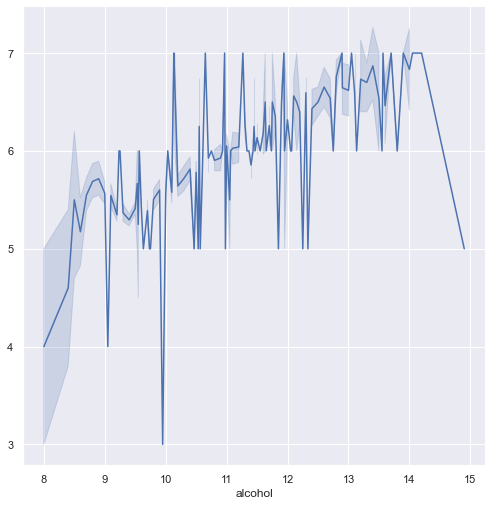

In [15]:
features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for feature in features:
    sns.set()
    sns.relplot(data=df , x=feature, y=Y, kind='line', height=7, aspect=1)

In [12]:
## Using Linear Regression with sklearn module

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=4)
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
y_pred = linear_regressor.predict(x_test)

accuracy = linear_regressor.score(x_test, y_test)
print(accuracy)

rmse_linear = mean_squared_error(y_test, y_pred)
print(rmse_linear)

0.3003199789534383
0.5276023892782313


In [13]:
'''
From 11.11% we climbed to a score of 30% which is better but not yet spectacular.
'''

'\nFrom 11.11% we climbed to a score of 30% which is better but not yet spectacular.\n'

In [14]:
## Sources
'''
https://medium.com/@srijaneogi31/predict-your-wine-quality-using-deep-learning-with-pytorch-424d736f0880
https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa
https://towardsdatascience.com/linear-regression-and-a-quality-bottle-of-wine-b053ab768a53

https://github.com/becodeorg/LIE-Thomas-1.26/blob/master/content/6.deep_learning/1.Structured_data/5.challenge.md
'''  

'\nhttps://medium.com/@srijaneogi31/predict-your-wine-quality-using-deep-learning-with-pytorch-424d736f0880\nhttps://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa\nhttps://towardsdatascience.com/linear-regression-and-a-quality-bottle-of-wine-b053ab768a53\n\nhttps://github.com/becodeorg/LIE-Thomas-1.26/blob/master/content/6.deep_learning/1.Structured_data/5.challenge.md\n'